# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import pylab 
import numpy as np
import math
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
len(df)

130

### 1. Is the distribution of body temperatures normal?

We can use a QQ plot to determine if a sample is normally distributed. In the graph below, it seems the sample is normal.

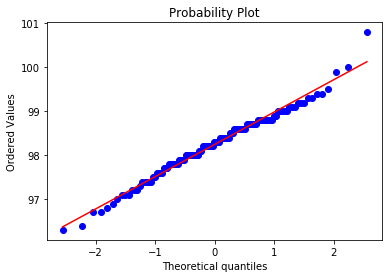

In [4]:
scipy.stats.probplot(df.temperature, dist="norm", plot=pylab)
pylab.show()

or we can use normaltest test (D’Agostino and Pearson) from scipy.stats.mstats.normaltest:
p value: A 2-sided chi squared probability for the hypothesis test.
The test tests the null hypothesis that the data was drawn from a normal distribution. Given 5% significance, we cannot reject the null hypothesis. 

In [7]:
scipy.stats.mstats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

## Is the sample size large? Are the observations independent?

Sampling distribution of sample mean follows a normal distribution asymptotically, such that,
$\frac{(\bar{x} - \mu)}{\sigma / \sqrt{n}} \sim Normal(0,1)$, then we can write the 
error with respect to sample size n, such that $e = z_{a/2}\frac{\sigma}{\sqrt{n}}$. Since we do not know the population standard deviation, we have to use sample standard deviation, such that, $e = t_{n-1}\frac{s}{\sqrt{n}}$. 

We can compute t first with $n-1$ df with 95% with equal tails:

In [4]:
stats.t.interval(0.95, len(df)-1)

(-1.9785244914586051, 1.9785244914586051)

and $s$ is

In [8]:
sd_sample = np.std(df['temperature'])
sd_sample

0.7303577789050377

In [11]:
const = stats.t.interval(0.95, len(df)-1)[1] * sd_sample
const

1.4450307530909261

If we want the error (the difference between our sample mean and true population mean less than 0.15), we can compute n for the error margin:

In [27]:
n_ = (const / 0.15)**2
n_

92.805061216823532

So I believe the size is sufficiently large for our study.

We cannot test for independence of observations. But if given sample was collected by in experimental design to test the reaction of vaccine, there might be a chance that observations might not be totally independently drawn from the whole population, e.g., for example, age was limited to 18 to 40 according to NYT.

## Is the true population mean really 98.6 degrees F?

We can set up a hypothesis test such that $H_0: \mu = 98.6$ vs $H_1: \mu \neq 98.6$.  
As we are quite confident with the sample size on which CLT is built on, we can use CLT such that:
$\frac{(\bar{x} - \mu)}{s / \sqrt{n}} \sim t_{n-1}$

In [36]:
np.mean(df.temperature)

98.24923076923078

In [32]:
t = (np.mean(df.temperature) - 98.6) / (sd_sample / len(df))
t

-62.435153450905

In [38]:
p = stats.t.cdf(t, df = len(df) - 1) * 2
p

2.9070505970373506e-98

the p value suggests we can reject the null hypothesis and conclude the true population mean is significantly different from 98.6.

Would you use a one-sample or two-sample test? Why?

ans: we should use one sample test because we are testing given certain confidence, how likely the population mean is significantly different from the sample mean. And in two sample test, we test whether the difference between two population mean is significant. additionally two 'samples' (if we treat the population distribution as a large sample) are not independent.

In this situation, is it appropriate to use the $t$ or $z$ statistic? 

ans: $t$, because we do not know the true population standard deviation. 

Now try using the other test. How is the result be different? Why?

two sample test gives the hypothesis as:
$H_0: \mu_s - \mu_p = 0$ vs $H_1: \mu_s - \mu_p \neq 0$. And we have: 
$ t = \frac{\mu_s - \mu_p}{\sqrt{\frac{s^2}{n_s} + \frac{\sigma^2}{n_p} }}$.

Because we have large $n_p$, so that $\frac{\sigma^2}{n_p}$ is close to 0. thus we can rearrange the terms:
$ t = \frac{\mu_s - \mu_p}{\sqrt{\frac{s^2}{n_s}}}$. 

In [39]:
t = (np.mean(df.temperature) - 98.6) / (sd_sample / len(df))
t

-62.435153450905

The result shows that it will be the same as one sample test, because as pointed out, the population is large, thus the result will be marginally different from the previous one sample test.

## At what temperature should we consider someone's temperature to be "abnormal"?

We first assume the underlying population follows a normal distribution; and given we do not know the true population standard deviation, we can write:
$\frac{(x - \mu)}{s} \sim t_{n-1}$. And compute the margin of error: $m.error = t_{0.5/2, df = 129} \times s$:

In [41]:
# margin of error:
const = stats.t.interval(0.95, len(df)-1)[1] * sd_sample
const

1.4450307530909261

In [43]:
# the confidence interval is just:
(np.mean(df.temperature)-const, np.mean(df.temperature) + const)

(96.804200016139845, 99.69426152232171)

## Is there a significant difference between males and females in normal temperature?

We can use the two sample t test because we like to compare if the means from both groups are sigificantly different from another. We write $H_0: \mu_m - \mu_f = 0$ vs $H_1: \mu_m - \mu_f \neq 0$. We use the test statistic $ t = \frac{\bar{x}_m - \bar{x}_f}{\sqrt{\frac{s_m^2}{n_m} + \frac{s_f^2}{n_f} }}$, which follows a t distribution.

In [25]:
mean_female = np.mean(df[df.gender == 'F'].temperature)
mean_male = np.mean(df[df.gender == 'M'].temperature)
n_female = len(df[df.gender == 'F'].temperature)
n_male = len(df[df.gender == 'M'].temperature)
var_female = np.var(df[df.gender == 'F'].temperature)
var_male = np.var(df[df.gender == 'M'].temperature)
d_f = len(df[df.gender == 'F'].temperature) - 1 # use the smaller one;

t = (mean_male - mean_female) / math.sqrt(var_male/n_male +  var_female/ n_female)
t

-2.3032202891940123

In [29]:
p = stats.t.cdf(t, df = d_f) * 2
p

0.024526425958324143

P value is less than 0.05, reject null hypothesis and conclude normal temperatures of both genders differ from each other.

The body normal temperature seems to follow normal distribution. The given normal temperature 98.6 is not statistically correct, and we also find that male normal temperature is different from female normal temperature.